In [5]:
from __future__ import division, print_function

import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import pandas as pd
import datetime
import glob

import matplotlib.lines as mlines
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [1]:
# lines to read:
CruiseTBL:
*ADMINISTRATION
    MISSION             : 1982-31
    AGENCY              : IOS, Ocean Ecology, Sidney, B.C.
    COUNTRY             : Canada
    PROJECT             : Strait of Georgia Pr
    SCIENTIST           : Mackas D.
    PLATFORM            : Vector
    
StationTBL:
*LOCATION
    STATION             : 26
    EVENT NUMBER        : 24
    LATITUDE            :  49  15.00000 N  ! (deg min)
    LONGITUDE           : 123  56.58000 W  ! (deg min)
    WATER DEPTH         : 238
    CAST DEPTH          : 225  
-> filename
        
ObsTBL:
get varnames:
    $TABLE: CHANNELS
    ! No Name                    Units            Minimum        Maximum
    !--- ----------------------- ---------------- -------------- --------------
       1 Sample_Number           n/a              1              9
       2 Depth                   metres           12             225.6
       3 Nitrate_plus_Nitrite    umol/L           6.6            29.1
       4 Silicate                umol/L           13.6           63.7
       5 Phosphate               umol/L           0.64           2.68
       6 Chlorophyll:Extracted   mg/m^3           0.61           5.28
       7 Temperature             'deg C (IPTS68)' 8.32           14.3
       8 Salinity                PSS-78           25.8           31.05
       9 Transmissivity          %/metre          42.7           81.2
    $END
*FILE
    START TIME          : PDT 1982/07/16 01:21:00.000
data:
*END OF HEADER
    9  12.0   6.6  13.6   0.64   5.28  14.30  25.80  42.7
    8  21.5  21.2  45.0   1.96   0.61  10.76  28.41  73.2
    7  30.5  23.5  47.4   2.06 -99.00  10.06  28.89  74.9
    6  52.3  28.0  50.2   2.35 -99.00   8.85  29.60  80.0
    5  75.4  26.5  49.1   2.33 -99.00   8.32  29.99  81.2
    4  99.6  26.1  40.5   2.25 -99.00   8.58  30.35  77.0
    3 124.7  29.1  50.2   2.04 -99.00   8.73  30.62  76.1
    2 149.3  25.3  48.9   2.23 -99.00   8.77  30.84  78.5
    1 225.6  28.5  63.7   2.68 -99.00   8.92  31.05  76.8
        
        
        
        

    for filename in sorted(filenames):
        f = open(os.path.join(sdir, filename), 'rt')
        ind=ind+1
        #print(f.shape[0][1][2)
        for line in f:
            line = line.strip()
            word = line.split()
            #print(line.split(',')[0])
            #print(word[0])
            #print(line[:])

            if (line.startswith('*') or word[0].startswith('L') or word[0].startswith('D')): #'*' for .cnv files; 'L' or 'D' 
#for .ctd files
                # header line, look for useful info
                if 'Latitude' in line:
                    #print(word[2])#,word[4],word[5])
                    if word[2] == 'Latitude':
                        globals()['latitude%s' %i][ind-1]= float(word[4])+ float(word[5])/60
                        #print(globals()['latitude%s' %i].shape)
                        #print(globals()['latitude%s' %i][0])
                    else:
                        globals()['latitude%s' %i][ind-1]= float(word[2])+ float(word[3])/60
                if 'LATITUDE' in line:
                    #print(word[2])
                    globals()['latitude%s' %i][ind-1]= float(word[2])
                if 'Longitude' in line:
                    #print(word[2],word[4],word[5])
                    if word[2] == 'Longitude':
                        globals()['longitude%s' %i][ind-1] = -(float(word[4])+ float(word[5])/60)                   
                    else:
                        globals()['longitude%s' %i][ind-1]= -float(word[2])+ float(word[3])/60
                if 'LONGITUDE' in line:
                    #print(word[2])
                    globals()['longitude%s' %i][ind-1]= -float(word[2])
                if '(Time)' in line:
                    #print(word[3])#,word[6],word[7],word[8])
                    if word[3] == '(Time)':
                        string = word[7] + ' ' + word[5] + ' ' + word[6] # Date only
                        #string = word[7] + ' ' + word[5] + ' ' + word[6] + ' ' + word[8] # Date & time
                        #print(string)
                        globals()['time%s' %i] = datetime.datetime.strptime(str(string),'%Y %b %d') # Date only
                        #globals()['time%s' %i] = datetime.datetime.strptime(str(string),'%Y %b %d %H:%M:%S') # Date & time
                        #print(globals()['time%s' %i])
                    else:
                        string = word[5] + ' ' + word[3] + ' ' + word[4]
                        globals()['time%s' %i] = datetime.datetime.strptime(str(string),'%Y %b %d') # Date only
                if 'DATE' in line:
                    #print(word[2])
                    string = word[2]
                    globals()['time%s' %i] = datetime.datetime.strptime(str(string),'%d-%b-%Y')
                    globals()['time%s' %i].strftime('%Y %b %d')
                if '** Station' in line:
                    station = line.partition(': ')[2]
                #if line == '*END*':
                 #   break
            elif line.startswith('# name'):     
                # comment line, look for plotable quantities information
                #print(QUANTITIES.items())
                #print(line.partition(': ')[2])
                #print(int(line.split(' ')[2]))
                if 'prDM' in line:
                    indexp = int(line.split(' ')[2])
                if 't090C' in line:
                    indexT = int(line.split(' ')[2])
                if 'sal00' in line:
                    indexS = int(line.split(' ')[2])
                if 'potemp090C' in line:
                    indexTheta = int(line.split(' ')[2])
                if 'sigma-é00' in line:
                    indexSig = int(line.split(' ')[2])
                    #print(indexS)
                
                
            elif (line.startswith('1') or line.startswith('2') or line.startswith('3') 
                  or line.startswith('4') or line.startswith('5') or line.startswith('6') or 
                  line.startswith('7') or line.startswith('8') or line.startswith('9')) and ',' in line: ### ctd files 
                    j=j+1
                    #print(line.split(',')[2])
                    globals()['p%s' %i][ind-1,j]= line.split(',')[0]
                    globals()['T%s' %i][ind-1,j]= line.split(',')[1]
                    globals()['S%s' %i][ind-1,j]= line.split(',')[2]

            elif (line.startswith('1') or line.startswith('2') or line.startswith('3') 
                  or line.startswith('4') or line.startswith('5') or line.startswith('6') or 
                  line.startswith('7') or line.startswith('8') or line.startswith('9')) and ',' not in line: ### CNV files
                    j=j+1                    
                    globals()['p%s' %i][ind-1,j]= word[indexp]
                    globals()['T%s' %i][ind-1,j]= word[indexT]
                    globals()['S%s' %i][ind-1,j]= word[indexS]
                    if float(word[indexSig]) < 15.0: ### mistake in files from 2004: inversion of density column and pot temp column 
                        #print("Inversion Theta/Sig!!!")
                        globals()['theta%s' %i][ind-1,j]= word[indexSig]
                        globals()['dens%s' %i][ind-1,j]= word[indexTheta]
                    else:
                        globals()['theta%s' %i][ind-1,j]= word[indexTheta]
                        globals()['dens%s' %i][ind-1,j]= word[indexSig]    
                    #print(globals()['dens%s' %i][ind-1,j])
                    
    #print(globals()['longitude%s' %i][2],globals()['time%s' %i])
    #print(globals()['S%s' %i][0,:],globals()['S%s' %i][1,:])
    #print(globals()['S%s' %i][0,:],globals()['S%s' %i][1,:])

    xs,ys= m(globals()['longitude%s' %i],globals()['latitude%s' %i])
    plt.plot(xs,ys,'o--',color=cmap((i-2003)*coef),label=i)
    globals()['l%s' % i] = mlines.Line2D([], [],linestyle='--',marker='o',color=cmap((i-2003)*coef),markersize=5, label=i)
    legend[i-i_init]=globals()['l%s' % i]
    #print(legend)
lgd=plt.legend(handles=legend,loc=1)
frame = lgd.get_frame()
frame.set_facecolor('1.0')

plt.show()


SyntaxError: invalid syntax (<ipython-input-1-712e96ccd27a>, line 2)

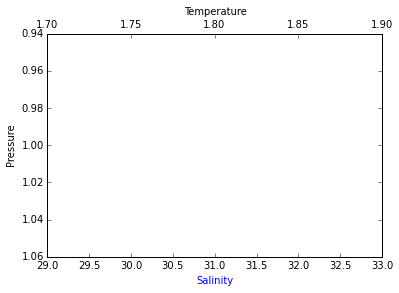

In [3]:
#for i in xrange(i_init,i_final,1)    
ax1 = plt.axes()#[0.08,0.1,0.25,0.4])
ax1.invert_yaxis()

ax1.plot(S2004,p2004,'b')    
ax1.set_xlabel('Salinity')
ax1.xaxis.label.set_color('blue')
ax1.set_ylabel('Pressure')
ax2 = ax1.twiny()
ax2.plot(T2004,p2004,'r')
ax2.set_xlabel('Temperature')
    
plt.show()

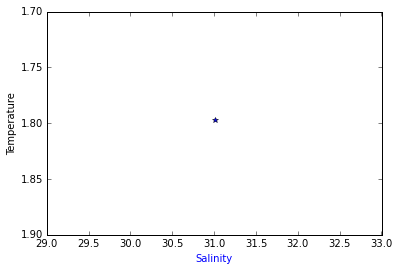

In [4]:
    ax1 = plt.axes()
    ax1.invert_yaxis()

    ax1.plot(S2004,T2004,'b*')    
    ax1.set_xlabel('Salinity')
    ax1.xaxis.label.set_color('blue')
    ax1.set_ylabel('Temperature')
    
plt.show()